In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [45]:
data = pd.read_csv('gb_total.csv')

In [46]:
targets = data.columns[1:]

In [163]:
def make_time_features(data, timestamps=[24, 12, 6, 5, 4, 3, 2, 1], target='mean_delay'):
    targets = []
    features = []
    features_mean = []
    for i in range(data.shape[0]):
        
        # prev values
        temp_arr = []
        for s in timestamps:
            temp = data.shift(s)[target].loc[i]
            temp_arr.append(temp)
            
        # mean
        for s in timestamps:
            temp = np.mean(data[target].loc[i-s:i-1])
            temp_arr.append(temp)
            
        targets.append(data[target].loc[i])
        features.append(temp_arr)
    
    res_df = pd.DataFrame(features)
    res_df['target_{}'.format(target)] = targets
    
    rename_dict = {}
    for i in range(len(timestamps)*2):
        if i < len(timestamps):
            rename_dict[i] = 'lag_{}_hours'.format(timestamps[i])
        else:
            rename_dict[i] = 'mean_{}_hours'.format(timestamps[len(timestamps) - i])
            
            
    res_df = res_df.rename(columns=rename_dict)
    res_df = res_df.dropna()
    
    return res_df.drop('target_{}'.format(target), axis=1), res_df['target_{}'.format(target)]

In [164]:
# def make_mean_features(data, timestamps=[24, 12, 6, 5, 4, 3, 2], target='mean_delay'):
#     target_column = data['target_{}'.format(target)]
#     features = []
#     for timestamp in timestamps:
#         column = [np.nan] * (timestamp-1)
#         for i in range(timestamp, len(data)):
#             data_slice = target_column[i-timestamp:i]
#             column.append(np.mean(data_slice))
#         features.append(column)
        
#     res_df = pd.DataFrame(np.array(features).T, columns=['mean_{}_hours'.format(timestamps[j])
#                           for j in range(len(timestamps))])
#     #res_df['target_{}'.format(target)] = target_column
#     return res_df

In [165]:
# def make_data(data, target='mean_delay'):
#     lags = make_time_features(data, target=target)
#     X = make_mean_features(lags, target=target)
#     X = pd.concat((X, lags), axis=1)
#     y = X['target_{}'.format(target)]
#     X = X.fillna(0).drop('target_{}'.format(target), axis=1)
#     return X, y

In [166]:
class TargetForecasting(object):
    def __init__(self, estimator='cat', **params):
        if estimator == 'cat':
            self.estimator = CatBoostRegressor(silent=True, **params)
        elif estimator == 'rf':
            self.estimator = RandomForestRegressor(**params)
        elif estimator == 'lin':
            self.estimator = LinearRegression(**params)
        
    def fit(self, X, y, **fit_params):
        self.estimator.fit(X, y, **fit_params)
    
    def predict(self, X):
        return self.estimator.predict(X)

In [167]:
def make_model(data_target, estimator='cat'):
    X, y = data_target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = TargetForecasting(estimator=estimator)
    model.fit(X_train, y_train)
    print('MAE (train):', mean_absolute_error(y_train, model.predict(X_train)))
    print('MAE:', mean_absolute_error(y_test, model.predict(X_test)))

In [168]:
for target in targets:
    print('target', target)
    data_time_features = make_time_features(data, target=target)
    make_model(data_time_features, estimator='lin')
    print()

target start_stop_alige_count_
MAE (train): 2514.265066634867
MAE: 2793.4467426291158

target start_stop_alige_count_Alive
MAE (train): 14448.065383898263
MAE: 15693.241575319213

target start_stop_alige_count_Start
MAE (train): 5912.36959426127
MAE: 6843.367511243549

target start_stop_alige_count_Stop
MAE (train): 2488.2320470847235
MAE: 2897.6839160079626

target type__count_Billing-Accounting
MAE (train): 20001.556886479633
MAE: 21351.4526222069

target type__count_Billing-Authentication
MAE (train): 1263.187327530517
MAE: 1242.6814015935036

target mean_delay
MAE (train): 0.015425411264080221
MAE: 0.015551402212526532

target mean_input_trafic
MAE (train): 146916272.72432372
MAE: 154760831.3606813

target mean_output_trafic
MAE (train): 488082334.4183722
MAE: 572978430.2527899

target count_failed
MAE (train): 135.10363125105414
MAE: 152.87203421578423



In [169]:
for target in targets:
    print('target', target)
    data_time_features = make_time_features(data, target=target)
    make_model(data_time_features, estimator='rf')
    print()

target start_stop_alige_count_


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE (train): 1286.4863636363636
MAE: 2642.8794871794867

target start_stop_alige_count_Alive


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE (train): 5548.772727272726
MAE: 14317.010256410256

target start_stop_alige_count_Start


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE (train): 2488.737012987013
MAE: 4095.241025641025

target start_stop_alige_count_Stop


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE (train): 1158.898701298701
MAE: 2621.4948717948723

target type__count_Billing-Accounting


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE (train): 9278.933766233766
MAE: 17065.282051282058

target type__count_Billing-Authentication


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE (train): 668.2727272727275
MAE: 949.9205128205131

target mean_delay


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE (train): 0.0047134135609030155
MAE: 0.013398094219326003

target mean_input_trafic


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE (train): 69326413.35640785
MAE: 177057729.96740142

target mean_output_trafic


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE (train): 245739042.8697699
MAE: 670628445.2681135

target count_failed
MAE (train): 43.68766233766234
MAE: 95.07948717948716



/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [170]:
for target in targets:
    print('target', target)
    data_time_features = make_time_features(data, target=target)
    make_model(data_time_features, estimator='cat')
    print()

target start_stop_alige_count_
MAE (train): 251.18720933917712
MAE: 2581.2506241366345

target start_stop_alige_count_Alive
MAE (train): 585.5403864092185
MAE: 13631.17694744232

target start_stop_alige_count_Start
MAE (train): 502.54351673431165
MAE: 3371.2604260416133

target start_stop_alige_count_Stop
MAE (train): 218.49707408053678
MAE: 2323.8844117865033

target type__count_Billing-Accounting
MAE (train): 1097.8294027356073
MAE: 13160.008896567822

target type__count_Billing-Authentication
MAE (train): 164.3161003677103
MAE: 802.8733686484095

target mean_delay
MAE (train): 0.0008800720572250893
MAE: 0.009299840458508775

target mean_input_trafic
MAE (train): 11643543.752258182
MAE: 152793914.69727463

target mean_output_trafic
MAE (train): 48894995.34903459
MAE: 621402211.2413698

target count_failed
MAE (train): 11.837647853880998
MAE: 114.13667966468788



### final fitting

In [254]:
pred_df = pd.DataFrame({'date': data[-24:]['date']})

for target in targets:
    
    data_time_features = make_time_features(data, target=target)

    forecaster = TargetForecasting(estimator='lin')
    
    
    X, y = data_time_features
    X_fit = X[:-1].values
    y_fit = y[:-1]

    forecaster.fit(X_fit, y_fit)

    X_pred = X.values[-24:]
    
    last_pred = forecaster.predict(X_pred)
    pred_df[target] = last_pred
    
    print('{} done'.format(target))

start_stop_alige_count_ done
start_stop_alige_count_Alive done
start_stop_alige_count_Start done
start_stop_alige_count_Stop done
type__count_Billing-Accounting done
type__count_Billing-Authentication done
mean_delay done
mean_input_trafic done
mean_output_trafic done
count_failed done


In [255]:
final_data = data.copy()

In [256]:
def plot_target(data, pred_data, target='start_stop_alige_count_'):
    
    fig = plt.figure(figsize=(8, 6))
    
    data['date'] = pd.to_datetime(data['date'])
    pred_data['date'] = pd.to_datetime(pred_data['date'])
    
    real_date, real_value = data.iloc[-24:-1]['date'], data.iloc[-24:-1][target]
    
    pred_date, pred_value = pred_data[-24:]['date'], pred_data[-24:][target]
    
    plt.title('{} per hour'.format(target))
    plt.plot(real_date, real_value, label='real')
    plt.plot(pred_date, pred_value, label='predicted', alpha=0.4)
    plt.legend()
    

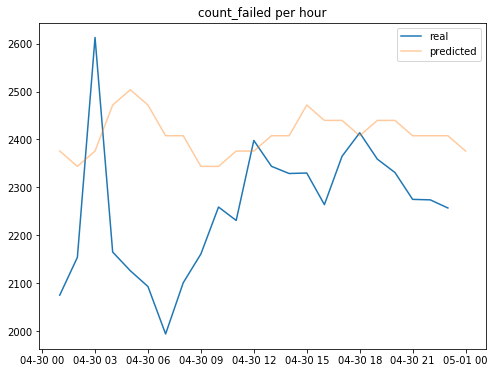

In [266]:
plot_target(final_data, pred_df, target=targets[9])